In [1]:
import os 
import re
import pandas as pd

import matplotlib.pyplot as plt

# Get data

In [2]:
files = os.listdir('./data')

In [3]:
selected = files

In [4]:
df_raw = pd.DataFrame()

for file in files:
    if file in selected:
        new_df = pd.read_excel('./data/' + file)
        df_raw = pd.concat([df_raw, new_df])

In [12]:
df_mdp = r"D:\OneDrive\UFPR\00.Economia\Disciplinas\4.1 - Desenvolvimento Econômico\Relatórios\Dados\mpd2020.xlsx"

df_mdp = pd.read_excel(df_mdp, sheet_name="Full data")

df_mdp = df_mdp.pivot_table(index="countrycode", values="gdppc", columns="year")
df_mdp = (
    df_mdp[range(1960, 2019)]
    .reset_index()
    .rename({"countrycode": "Country Code"}, axis=1)
)
df_mdp["Series Code"] = "gdpc"

# Treat data

,Series Code,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
6,NY.ADJ.SVNG.PC.CD,RUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,712.0495,937.962891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NY.ADJ.ICTR.CD,RUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,449306324052.383972,390821000117.551025,524308986807.736023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NY.ADJ.SVNG.PC.CD,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1617.312697,1579.50346,2031.715185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NY.ADJ.ICTR.CD,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6250761056933.240234,6451769282370.44043,7960682632221.219727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NY.ADJ.SVNG.PC.CD,FRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3944.322118,2351.29373,4141.12519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5939,SG.VAW.REFU.ZS,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5940,SP.M15.2024.FE.ZS,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5941,SP.M18.2024.FE.ZS,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5942,SH.DYN.AIDS.FE.ZS,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.3,22.2,22.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df = df_raw.dropna(subset=["Country Code"])

years_columns = [c for c in df.columns if re.search(r"\d+", c)]
columns = ["Country Code", "Series Code", *years_columns]

df = df.loc[:, columns].replace("..", 'NaN')

# treat years
years = [int(y.split()[0]) for y in years_columns]
years.sort()

rename_dict = {yn: y for yn, y in zip(years_columns, years)}
df = df.rename(rename_dict, axis=1)

df = df.dropna(subset=years, how="all")

df = df.drop_duplicates(['Country Code', 'Series Code'], keep='last')

df = df[['Series Code', 'Country Code', *list(range(1960, 2019))]]


# ADD MDP
df_raw_t = pd.concat([df, df_mdp])


In [39]:
countries = ['RUS', 'USA']

# select vars
vars = {
    "gdpc": "GDP per capta",
   # "NY.ADJ.NNTY.PC.KD.ZG": "Adjusted net national income per capita (annual % growth)",
    #"NY.ADJ.NNTY.PC.KD": "Adjusted net national income per capita (constant 2015 US$)",
    "NY.ADJ.NNTY.PC.CD": "Adjusted net national income per capita (current US$)",
   # "NY.ADJ.ICTR.GN.ZS": "Adjusted savings: gross savings (% of GNI)",
   # "NY.GDP.MKTP.KD.ZG": "GDP growth (annual %)",
   # "NY.GDP.PCAP.KD": "GDP per capita (constant 2005 US$)",
   # "NY.ADJ.NNTY.KD.ZG": "Adjusted net national income (annual % growth)",
   # "NY.ADJ.NNTY.PC.KD": "Adjusted net national income per capita (constant 2015 US$)",
    "SE.TER.ENRR": "Gross enrolment ratio for tertiary education, both sexes (%)",
   "NE.GDI.TOTL.ZS": "Gross capital formation (% of GDP)",
    "SP.POP.TOTL": "Population, total",
    #"EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    # "EG.USE.PCAP.KG.OE": "Energy use (kg of oil equivalent per capita)",
    # "MS.MIL.XPND.GD.ZS": "Military expenditure (% of GDP)",
    # "EG.ELC.COAL.ZS": "Electricity production from coal sources (% of total)",
    #"IT.MLT.MAIN.P2": "Fixed telephone subscriptions (per 100 people)",
    # "TX.VAL.MRCH.HI.ZS": "Merchandise exports to high-income economies (% of total merchandise exports)",
    # "FM.AST.PRVT.GD.ZS": "Monetary Sector credit to private sector (% GDP)",
}



df = (
    df_raw_t[(df_raw_t["Series Code"].isin(vars.keys())) & (df_raw_t["Country Code"].isin(countries))]
    .set_index(["Country Code", "Series Code"])
    .astype("float")
)

# df = df.iloc[:, :63]

# Interpolation

In [59]:
df_interpolated = df.infer_objects(copy=False).interpolate(axis=1,limit_direction='both')



VAR: gdpc GDP per capta


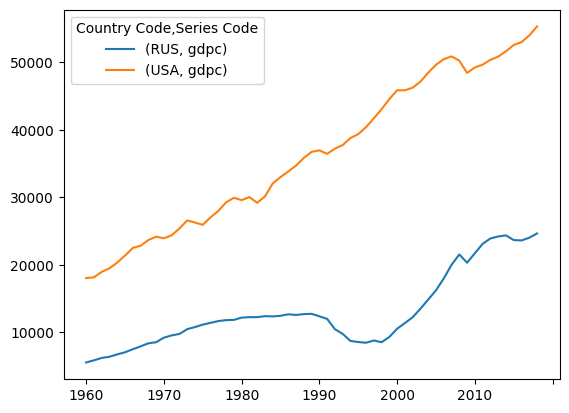



VAR: NY.ADJ.NNTY.PC.CD Adjusted net national income per capita (current US$)


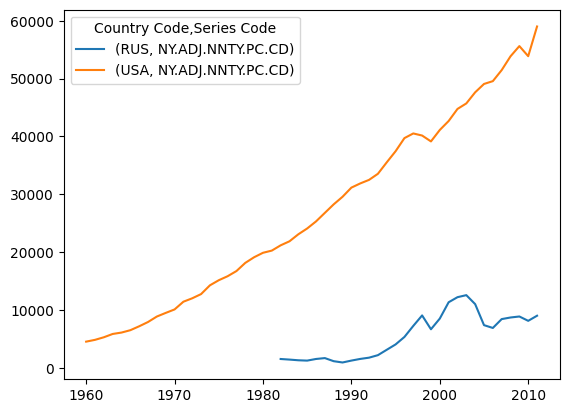



VAR: SE.TER.ENRR Gross enrolment ratio for tertiary education, both sexes (%)


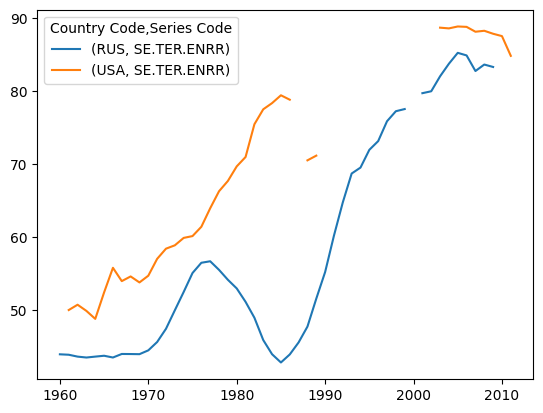



VAR: NE.GDI.TOTL.ZS Gross capital formation (% of GDP)


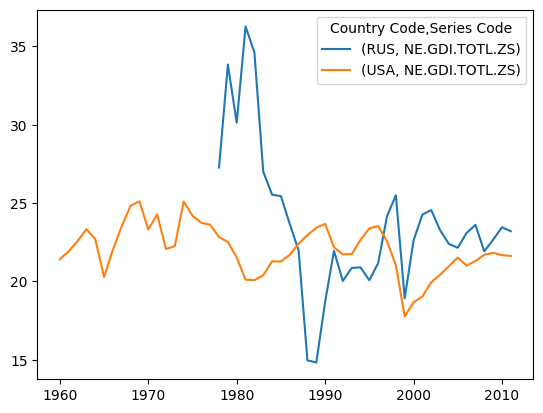



VAR: SP.POP.TOTL Population, total


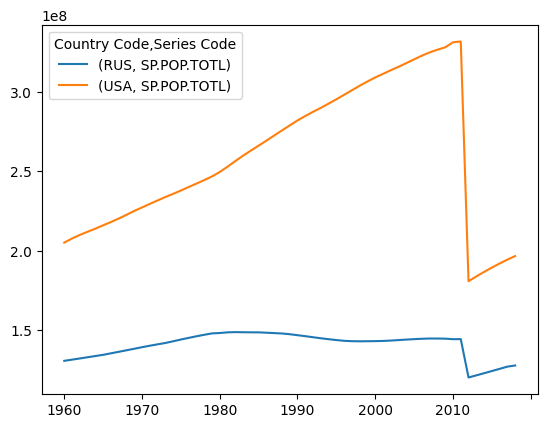

In [40]:
for var in vars:

    print('\n\nVAR:', f"{var} {vars.get(var)}")
    df_plot = df.filter(regex=var,axis=0)

    df_plot.T.plot()

    # df_interpolated.filter(regex=var,axis=0).T.plot()

    plt.show()

# Melt both dataframes

In [245]:
df_long = df.reset_index().melt(id_vars=['Country Code', 'Series Code'], value_vars=df.columns, var_name='Year')
df_interpolated_long = df_interpolated.reset_index().melt(id_vars=['Country Code', 'Series Code'], value_vars=df_interpolated.columns, var_name='Year')

In [257]:
df_interpolated_long.sort_values(['Country Code', 'Series Code', 'Year']).to_excel('interpolated_data.xlsx', index=False)
df_long.sort_values(['Country Code', 'Series Code', 'Year']).to_excel('treated_data.xlsx', index=False)